In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from windrose import WindroseAxes
from matplotlib import cm
from scipy.stats import zscore

In [2]:
data_benin = pd.read_csv('../data/raw/benin-malanville.csv')

In [3]:
data_benin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [4]:
data_benin.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [5]:
data_benin.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [7]:
data_benin['Timestamp'] = pd.to_datetime(data_benin['Timestamp'])

In [8]:
stats = data_benin.describe(include='number').transpose()
stats['median'] = data_benin.median()
print(stats)

                  count        mean         std    min    25%    50%    75%  \
GHI            525600.0  240.559452  331.131327  -12.9   -2.0    1.8  483.4   
DNI            525600.0  167.187516  261.710501   -7.8   -0.5   -0.1  314.2   
DHI            525600.0  115.358961  158.691074  -12.6   -2.1    1.6  216.3   
ModA           525600.0  236.589496  326.894859    0.0    0.0    4.5  463.7   
ModB           525600.0  228.883576  316.536515    0.0    0.0    4.3  447.9   
Tamb           525600.0   28.179683    5.924297   11.0   24.2   28.0   32.3   
RH             525600.0   54.487969   28.073069    2.1   28.8   55.1   80.1   
WS             525600.0    2.121113    1.603466    0.0    1.0    1.9    3.1   
WSgust         525600.0    2.809195    2.029120    0.0    1.3    2.6    4.1   
WSstdev        525600.0    0.473390    0.273395    0.0    0.4    0.5    0.6   
WD             525600.0  153.435172  102.332842    0.0   59.0  181.0  235.1   
WDstdev        525600.0    8.582407    6.385864    0

In [9]:
# Replace negative values in GHI, DNI, and DHI with NaN
columns_to_clean = ['GHI', 'DNI', 'DHI']
for col in columns_to_clean:
    data_benin[col] = data_benin[col].apply(lambda x: np.nan if x < 0 else x)

In [10]:
# Drop the 'Comments' column as it is entirely null
if 'Comments' in data_benin.columns:
    data_benin.drop(columns=['Comments'], inplace=True)

In [11]:
# Check for missing values after cleaning
print(data_benin.isnull().sum())


Timestamp             0
GHI              258847
DNI              275987
DHI              259182
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
dtype: int64


In [ ]:
# Save the cleaned dataset to a new file
data_benin.to_csv('../data/intermediate/benin.csv', index=False)

In [13]:
# Interpolating missing values in GHI, DNI, and DHI columns using linear method
columns_to_interpolate = ['GHI', 'DNI', 'DHI']
for col in columns_to_interpolate:
    data_benin[col] = data_benin[col].interpolate(method='linear', limit_direction='both')


In [14]:
data_benin.isnull().sum()

Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
dtype: int64

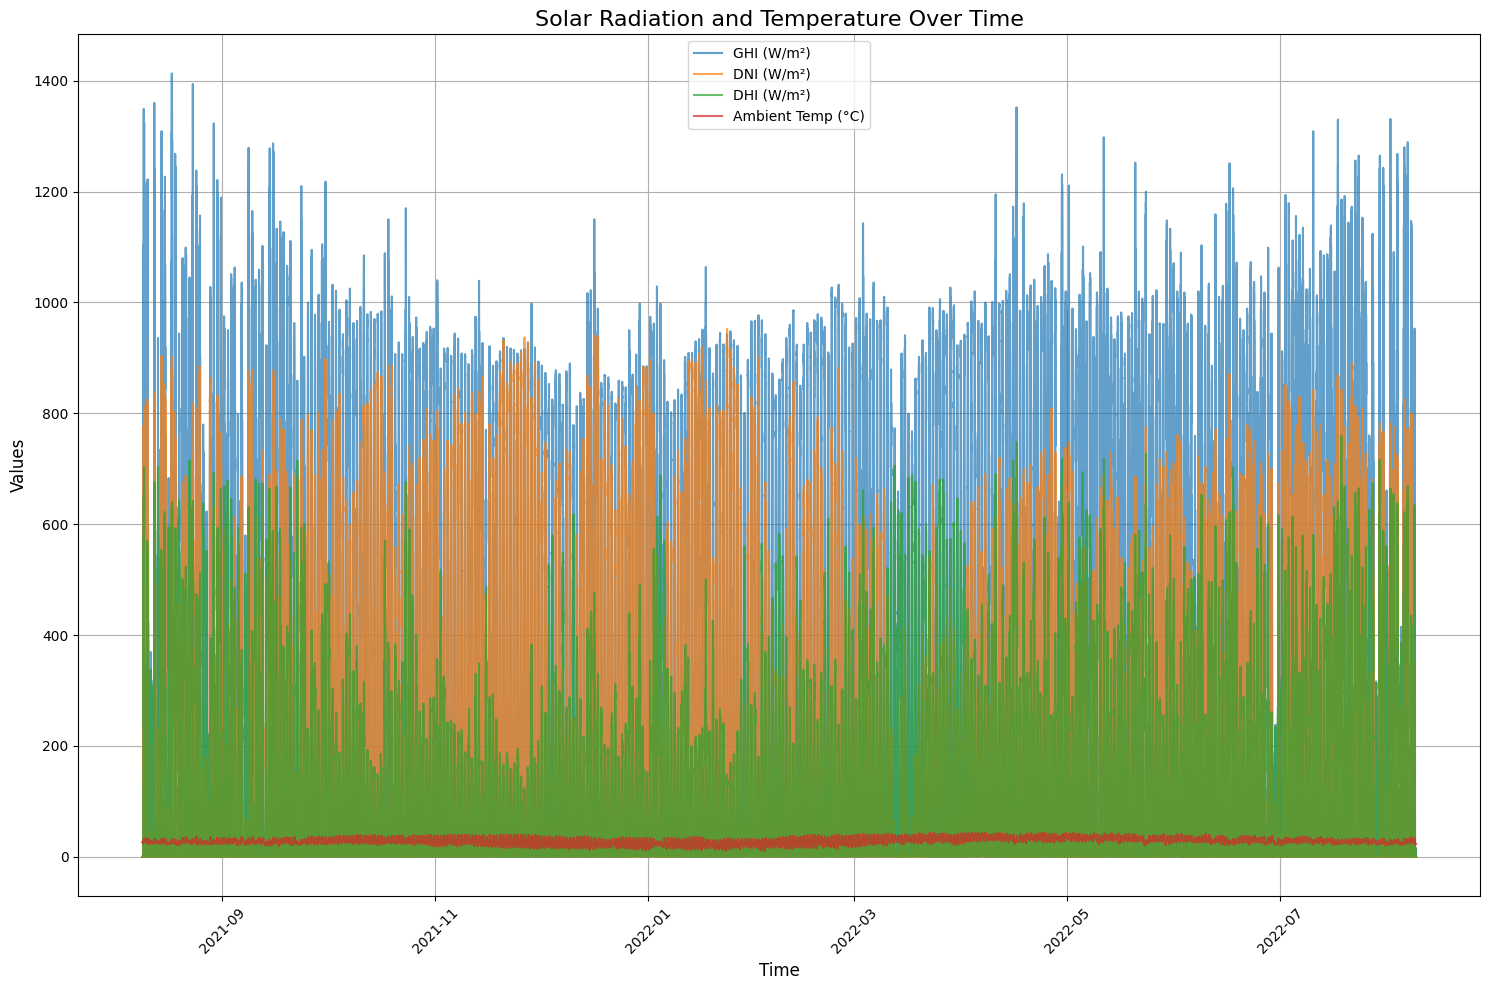

In [15]:
# Plot GHI, DNI, DHI, and Tamb over time
plt.figure(figsize=(15, 10))
plt.plot(data_benin['Timestamp'], data_benin['GHI'], label='GHI (W/m²)', alpha=0.7)
plt.plot(data_benin['Timestamp'], data_benin['DNI'], label='DNI (W/m²)', alpha=0.7)
plt.plot(data_benin['Timestamp'], data_benin['DHI'], label='DHI (W/m²)', alpha=0.7)
plt.plot(data_benin['Timestamp'], data_benin['Tamb'], label='Ambient Temp (°C)', alpha=0.7)
plt.title('Solar Radiation and Temperature Over Time', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

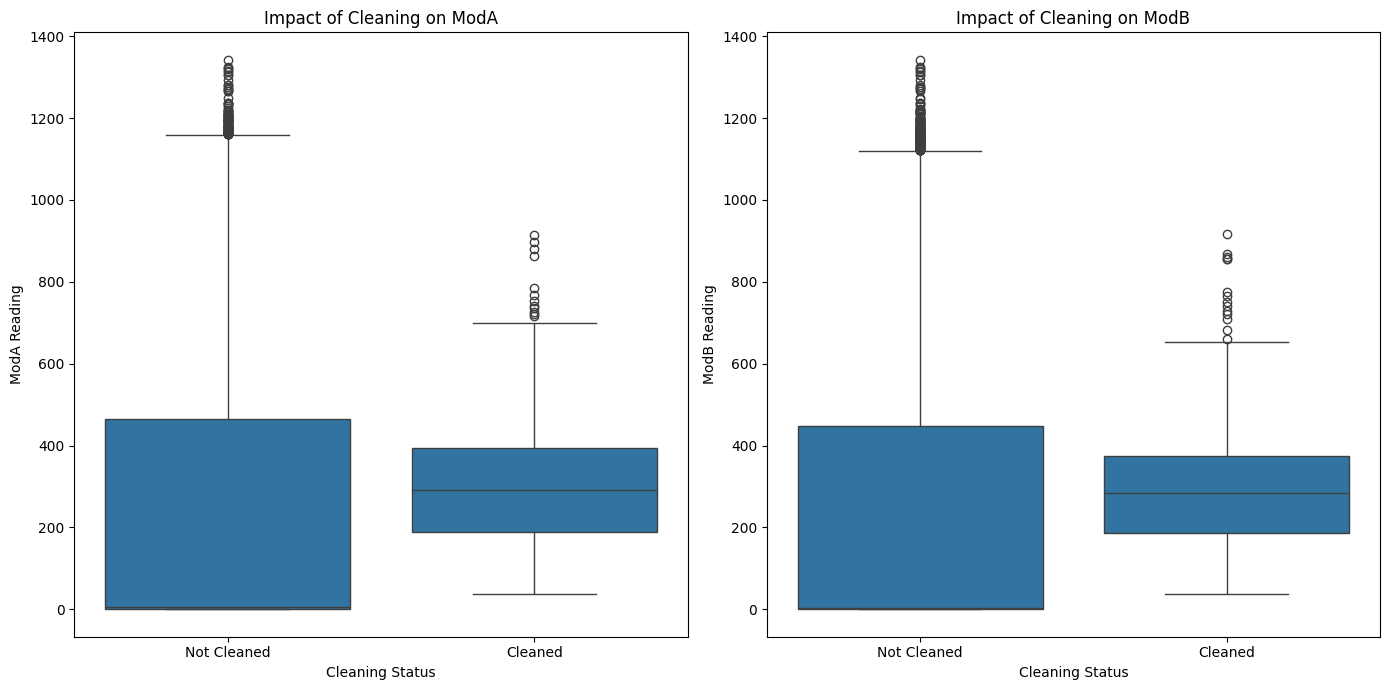

In [ ]:
# Create a 'Cleaned' column based on the Cleaning flag
data_benin['Cleaned'] = data_benin['Cleaning'].apply(lambda x: 'Cleaned' if x > 0 else 'Not Cleaned')

# Create boxplots for ModA and ModB
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.boxplot(x='Cleaned', y='ModA', data=data_benin)
plt.title('Impact of Cleaning on ModA')
plt.ylabel('ModA Reading')
plt.xlabel('Cleaning Status')

plt.subplot(1, 2, 2)
sns.boxplot(x='Cleaned', y='ModB', data=data_benin)
plt.title('Impact of Cleaning on ModB')
plt.ylabel('ModB Reading')
plt.xlabel('Cleaning Status')

plt.tight_layout()
plt.show()


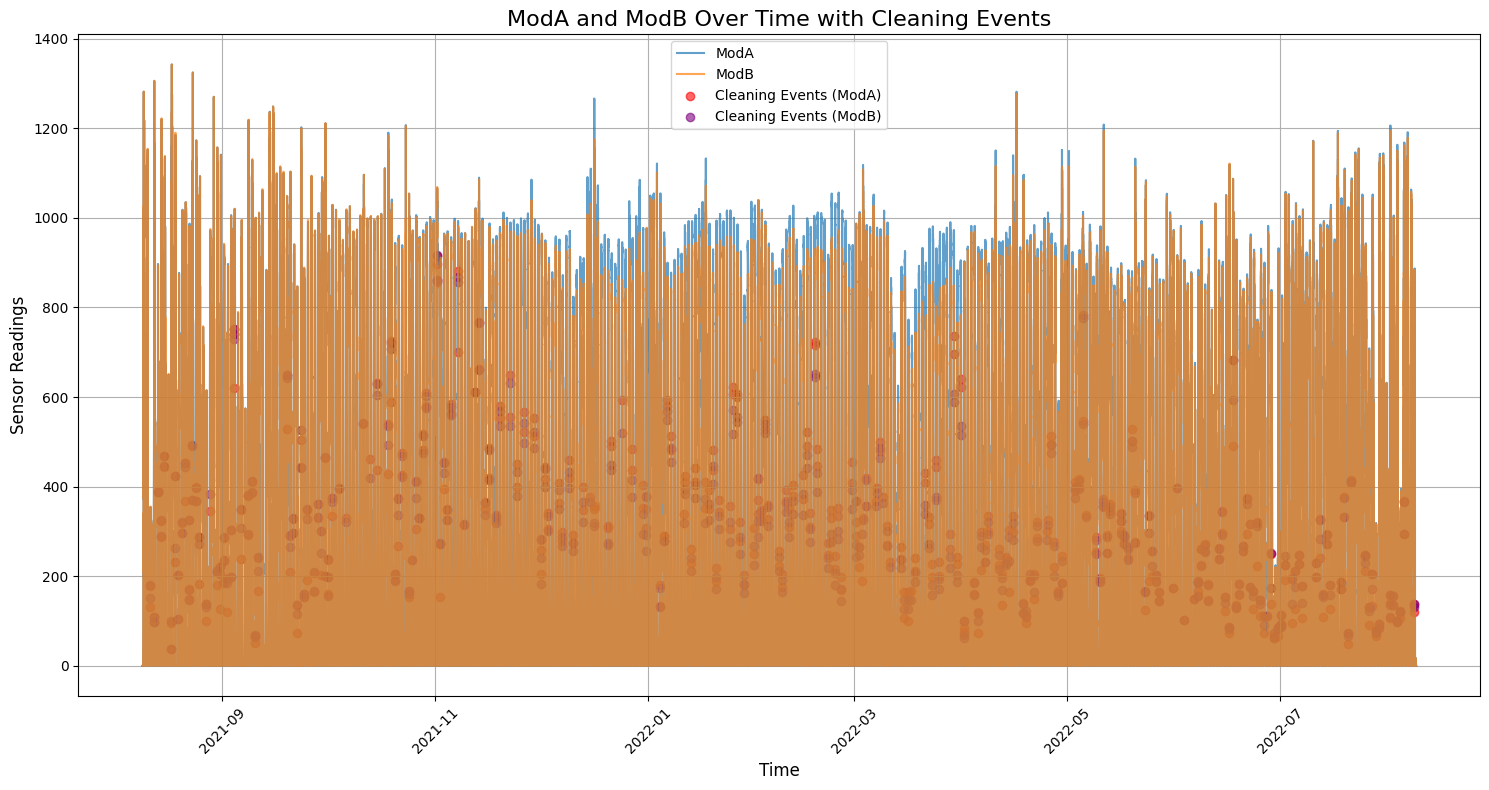

In [17]:
# Highlight cleaning periods on ModA and ModB time series
plt.figure(figsize=(15, 8))
plt.plot(data_benin['Timestamp'], data_benin['ModA'], label='ModA', alpha=0.7)
plt.plot(data_benin['Timestamp'], data_benin['ModB'], label='ModB', alpha=0.7)

# Highlight cleaning events
cleaning_times = data_benin[data_benin['Cleaning'] > 0]
plt.scatter(cleaning_times['Timestamp'], cleaning_times['ModA'], color='red', label='Cleaning Events (ModA)', alpha=0.6)
plt.scatter(cleaning_times['Timestamp'], cleaning_times['ModB'], color='purple', label='Cleaning Events (ModB)', alpha=0.6)
plt.title('ModA and ModB Over Time with Cleaning Events', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Sensor Readings', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


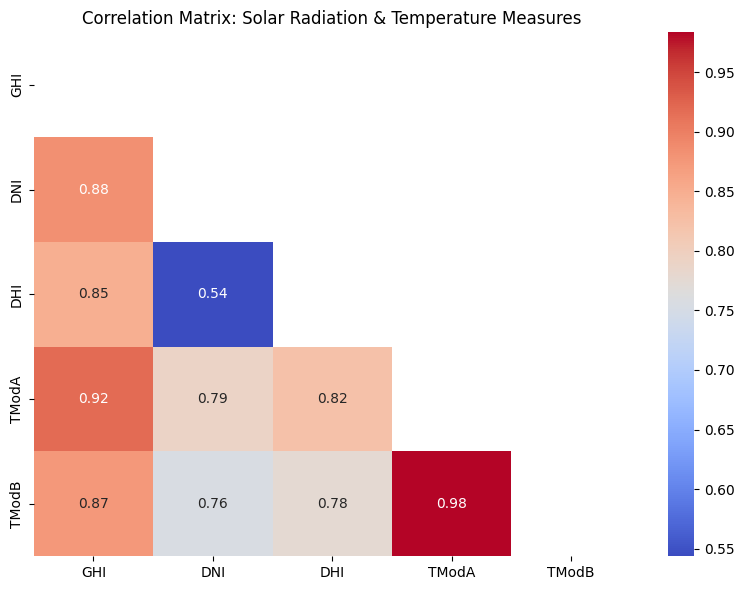

In [20]:
# Select relevant columns for correlation
radiation_temp_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
correlation_matrix = data_benin[radiation_temp_columns].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", mask=np.triu(correlation_matrix))
plt.title("Correlation Matrix: Solar Radiation & Temperature Measures")
plt.tight_layout()

plt.show()


<Figure size 1000x1000 with 0 Axes>

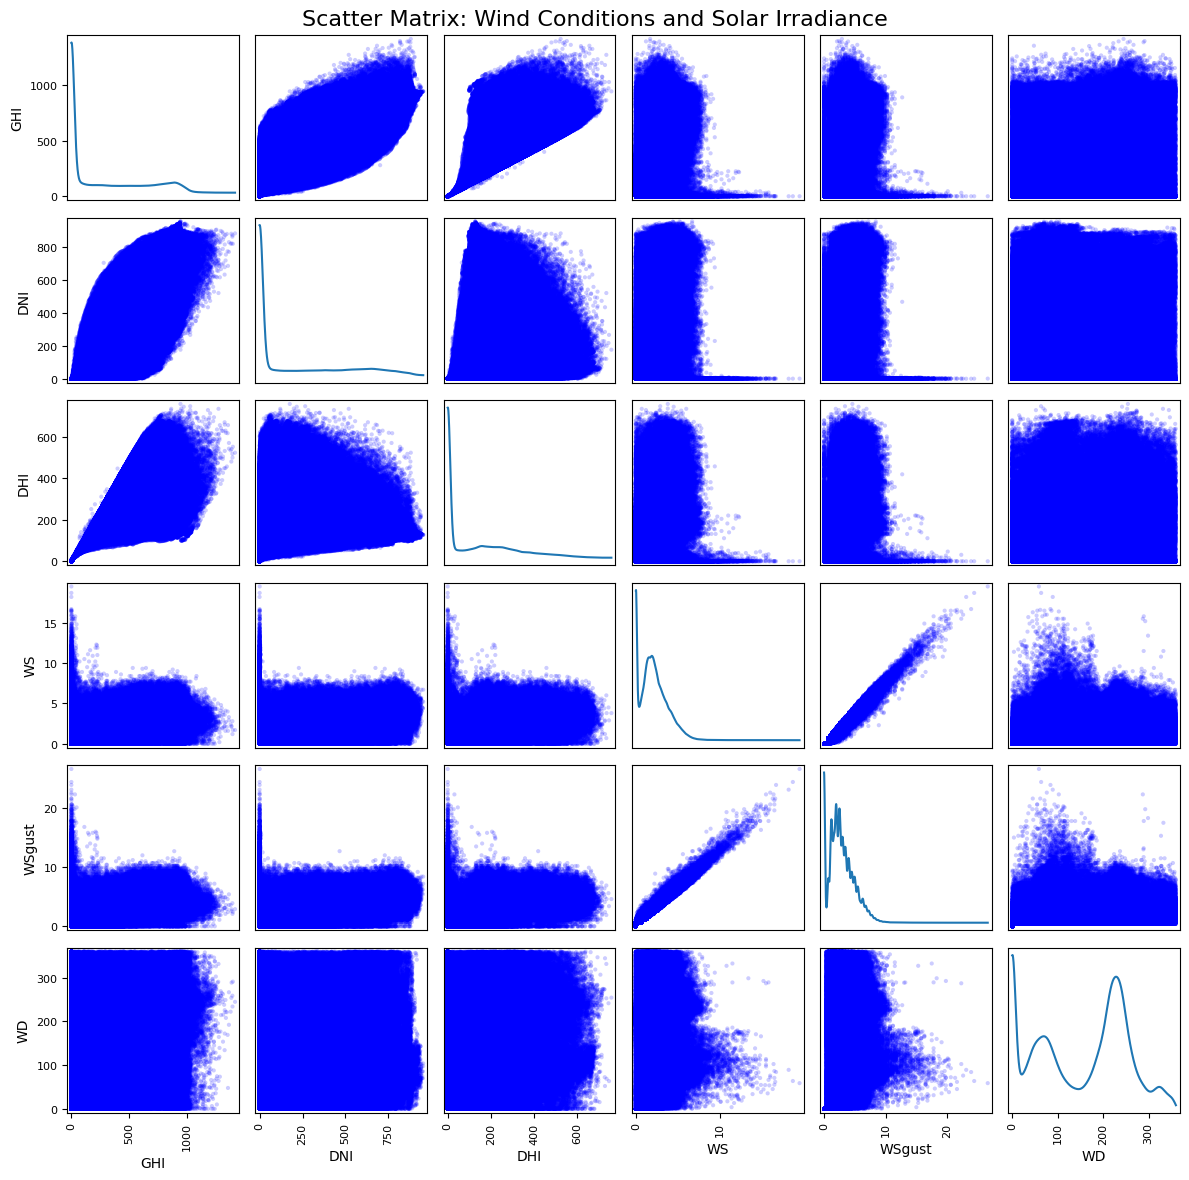

In [23]:
# Select relevant columns for scatter matrix
wind_solar_columns = ['GHI', 'DNI', 'DHI', 'WS', 'WSgust', 'WD']

# Create the scatter matrix
plt.figure(figsize=(10, 10))
scatter_matrix(data_benin[wind_solar_columns], alpha=0.2, figsize=(12, 12), diagonal='kde', color='blue')
plt.suptitle("Scatter Matrix: Wind Conditions and Solar Irradiance", fontsize=16)
plt.tight_layout()
plt.show()

<Figure size 800x800 with 0 Axes>

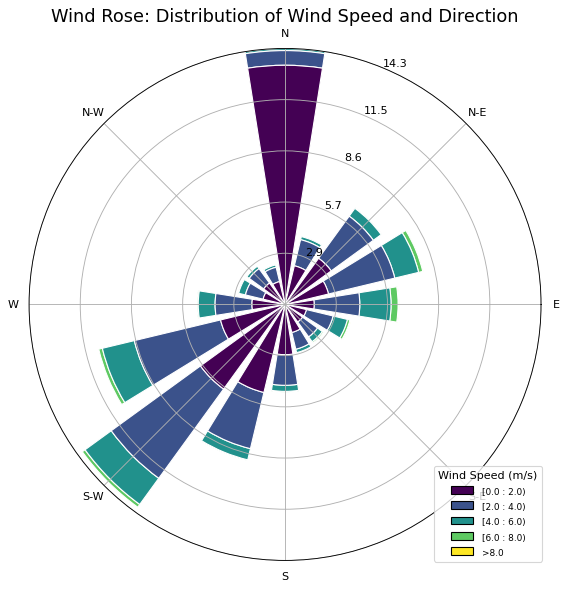

In [27]:
# Extract relevant wind data
wind_speed = data_benin['WS']
wind_direction = data_benin['WD']

# Create the wind rose plot
fig = plt.figure(figsize=(8, 8))
ax = WindroseAxes.from_ax()
ax.bar(wind_direction, wind_speed, normed=True, opening=0.8, edgecolor='white',
       bins=np.arange(0, 10, 2), cmap=cm.viridis) 

ax.set_legend(title="Wind Speed (m/s)", loc="lower right", fontsize=10)
plt.title("Wind Rose: Distribution of Wind Speed and Direction", fontsize=16)

plt.show()


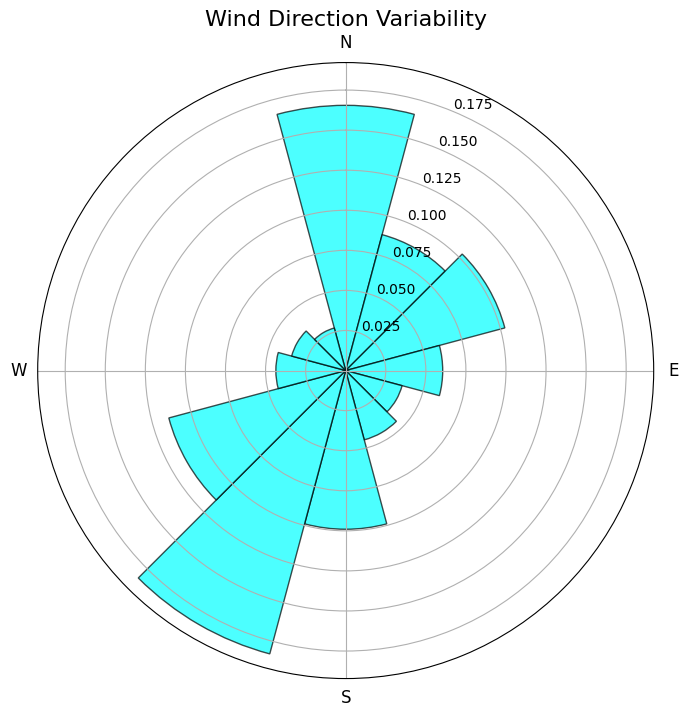

In [28]:
# Bins every 30°
wind_direction_bins = np.arange(0, 360 + 30, 30) 
wind_direction_counts = np.histogram(wind_direction, bins=wind_direction_bins)[0]

# Normalize counts
wind_direction_normalized = wind_direction_counts / wind_direction_counts.sum()

# Create the radial bar plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))
angles = np.radians(wind_direction_bins[:-1])  # Convert bins to radians
bars = ax.bar(angles, wind_direction_normalized, width=np.radians(30), color='cyan', edgecolor='black', alpha=0.7)

# Set 0° at the top, clockwise direction
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_xticks(np.radians([0, 90, 180, 270]))
ax.set_xticklabels(['N', 'E', 'S', 'W'], fontsize=12)
ax.set_title("Wind Direction Variability", fontsize=16)

plt.show()


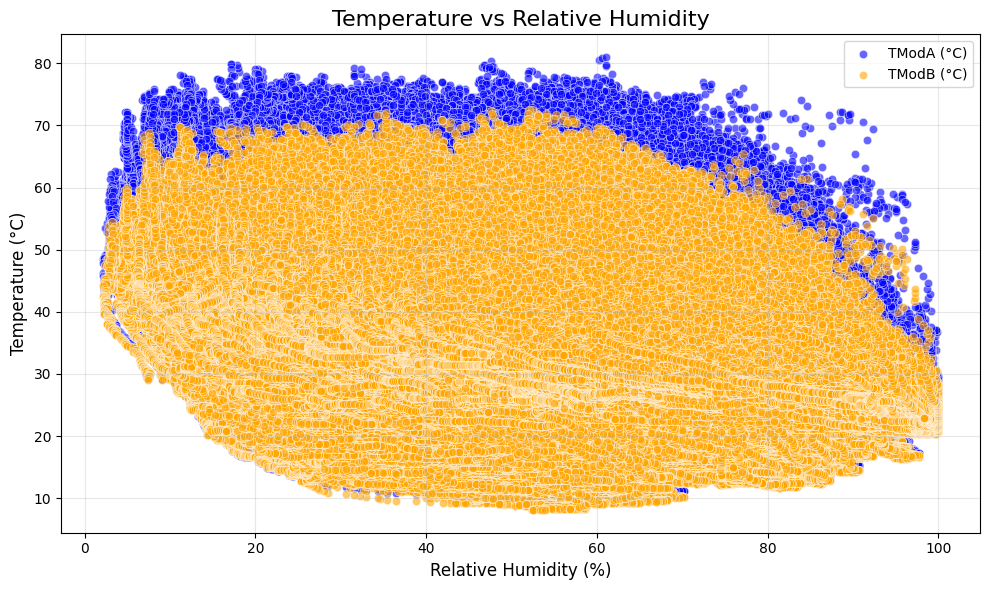

In [29]:
# Extract relevant variables for analysis
ghi = data_benin['GHI']
dni = data_benin['DNI']
dhi = data_benin['DHI']
ws = data_benin['WS']
tmoda = data_benin['TModA']
tmodb = data_benin['TModB']
rh = data_benin['RH']

# Temperature vs Relative Humidity
plt.figure(figsize=(10, 6))
sns.scatterplot(x=rh, y=tmoda, label="TModA (°C)", alpha=0.6, color='blue')
sns.scatterplot(x=rh, y=tmodb, label="TModB (°C)", alpha=0.6, color='orange')
plt.title("Temperature vs Relative Humidity", fontsize=16)
plt.xlabel("Relative Humidity (%)", fontsize=12)
plt.ylabel("Temperature (°C)", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

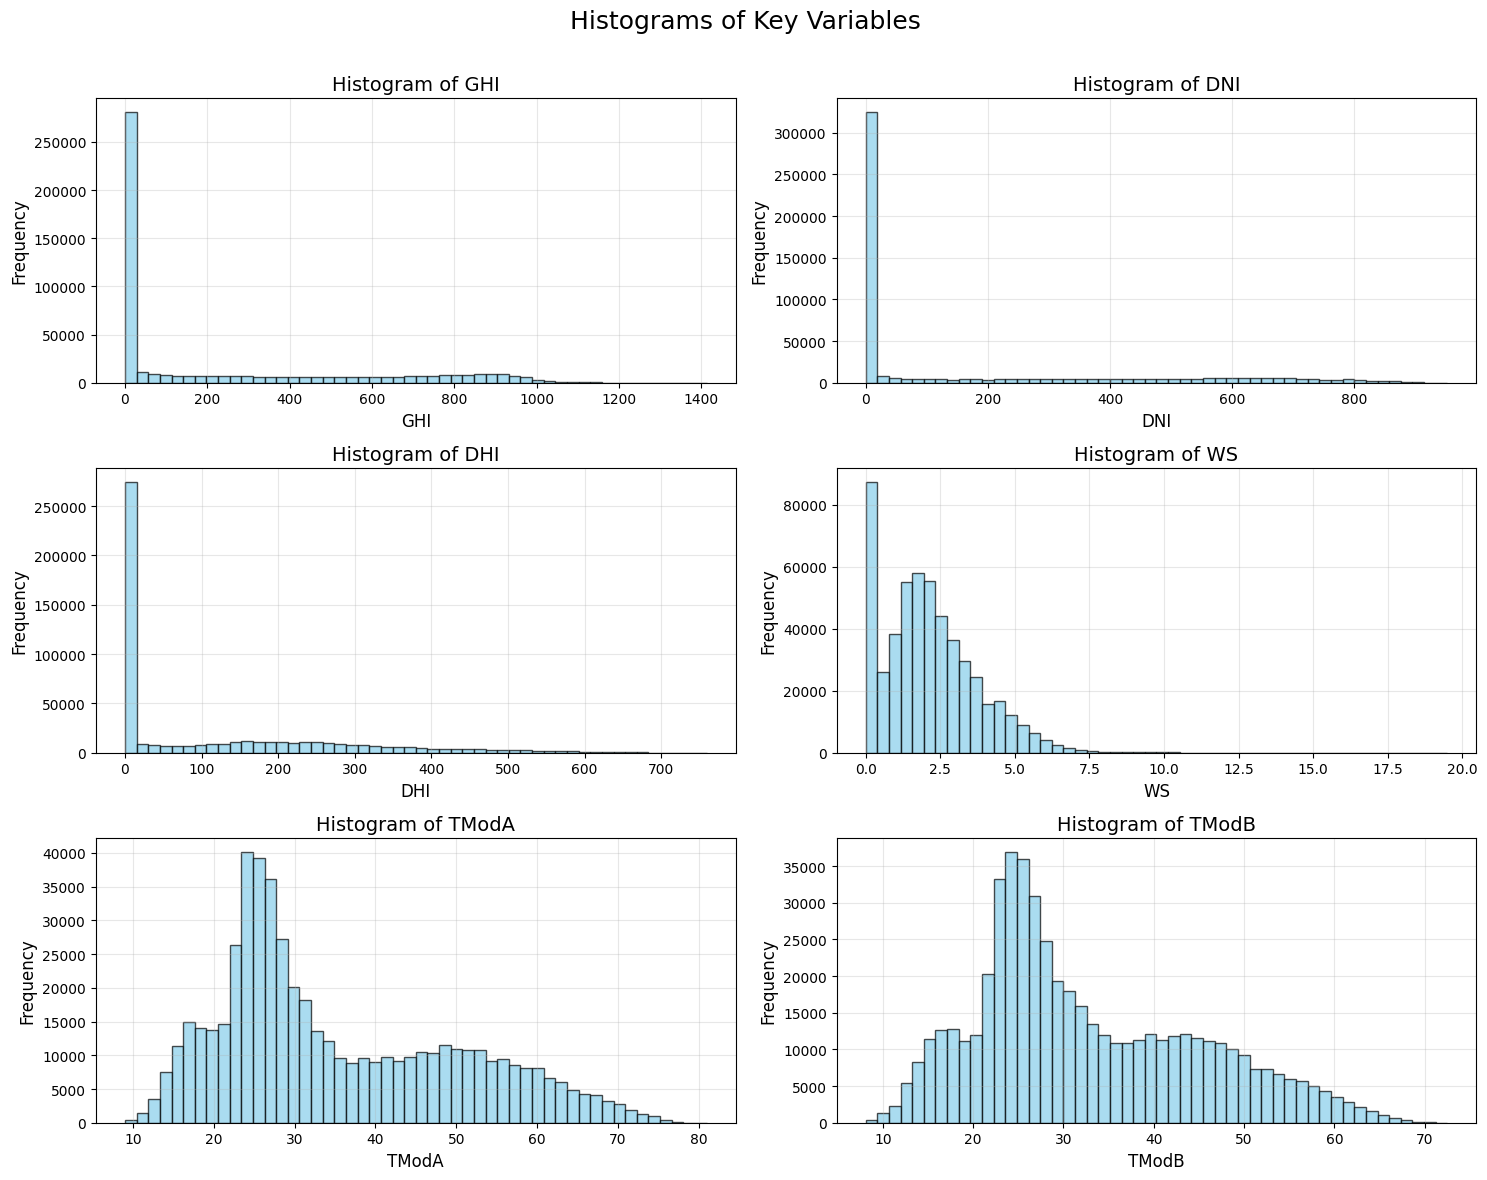

In [30]:
# Histograms for Variables
variables = {'GHI': ghi, 'DNI': dni, 'DHI': dhi, 'WS': ws, 'TModA': tmoda, 'TModB': tmodb}

plt.figure(figsize=(15, 12))
for i, (name, var) in enumerate(variables.items(), 1):
    plt.subplot(3, 2, i)
    plt.hist(var, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f"Histogram of {name}", fontsize=14)
    plt.xlabel(name, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(alpha=0.3)

plt.suptitle("Histograms of Key Variables", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [32]:
# Calculate Z-scores for key variables
columns_to_analyze = ['GHI', 'DNI', 'DHI', 'Tamb', 'WS', 'RH', 'BP']
z_scores = data_benin[columns_to_analyze].apply(zscore)

# Add Z-scores back to the original dataframe for reference
for col in columns_to_analyze:
    data_benin[f'{col}_zscore'] = z_scores[col]

# Identify outliers: Flag data points with Z-score > 3 or < -3
outliers = (z_scores.abs() > 3).any(axis=1)
data_benin['is_outlier'] = outliers

# Print outlier counts for review
print(f"Number of Outliers Detected: {outliers.sum()}")
print("Sample Outliers:")
print(data_benin.loc[data_benin['is_outlier']].head())

Number of Outliers Detected: 7883
Sample Outliers:
              Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH  \
670 2021-08-09 11:11:00   836.0  235.0  610.6   778.8   783.8  30.3  68.2   
671 2021-08-09 11:12:00  1274.0  698.8  615.2  1210.3  1210.3  30.1  69.6   
672 2021-08-09 11:13:00   938.0  340.1  612.8   891.1   891.1  30.4  68.4   
673 2021-08-09 11:14:00   718.5  126.8  593.2   682.6   682.6  30.6  68.2   
674 2021-08-09 11:15:00  1349.0  771.8  618.0  1281.5  1281.5  30.9  67.1   

      WS  WSgust  ...  TModB      Cleaned  GHI_zscore  DNI_zscore  DHI_zscore  \
670  3.2     4.1  ...   52.7  Not Cleaned    1.799674    0.258148    3.135689   
671  3.4     4.1  ...   53.1  Not Cleaned    3.126852    2.031646    3.164918   
672  3.4     4.6  ...   54.3  Not Cleaned    2.108743    0.660034    3.149668   
673  4.7     5.6  ...   54.2  Not Cleaned    1.443639   -0.155592    3.025129   
674  4.0     4.6  ...   53.5  Not Cleaned    3.354109    2.310787    3.182709   


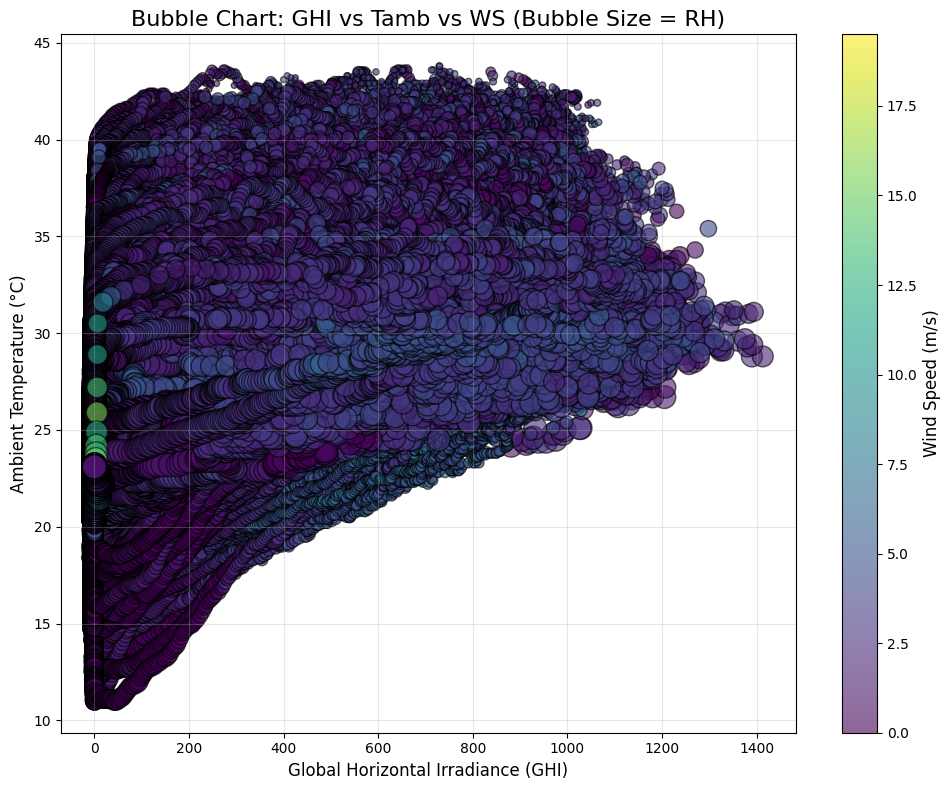

In [33]:
# Select variables for the bubble chart
ghi = data_benin['GHI']
tamb = data_benin['Tamb']
ws = data_benin['WS']
rh = data_benin['RH']

# Plot Bubble Chart
plt.figure(figsize=(10, 8))
bubble_size = rh / rh.max() * 300  # Normalize and scale bubble size
scatter = plt.scatter(ghi, tamb, s=bubble_size, c=ws, cmap='viridis', alpha=0.6, edgecolor='k')

# Add color bar and labels
cbar = plt.colorbar(scatter)
cbar.set_label('Wind Speed (m/s)', fontsize=12)

plt.title("Bubble Chart: GHI vs Tamb vs WS (Bubble Size = RH)", fontsize=16)
plt.xlabel("Global Horizontal Irradiance (GHI)", fontsize=12)
plt.ylabel("Ambient Temperature (°C)", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [34]:
# Save the processed dataset to a new file
data_benin.to_csv('../data/processed/benin.csv', index=False)